In [ ]:
from google.colab import drive #import your data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# /content/drive/MyDrive/wine/wine_quality_merged.csv

In [ ]:
import pandas as pd #import panda lib


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/wine/wine_quality_merged.csv")

In [ ]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Type of Wine ')

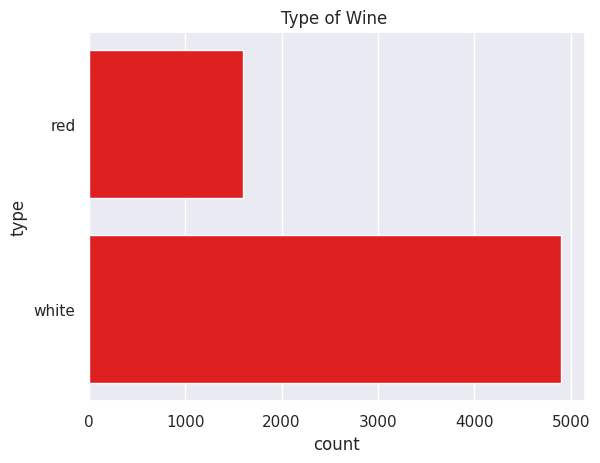

In [ ]:
sns.countplot(data["type"], color= "red")
plt.title("Type of Wine ")

<function matplotlib.pyplot.show(close=None, block=None)>

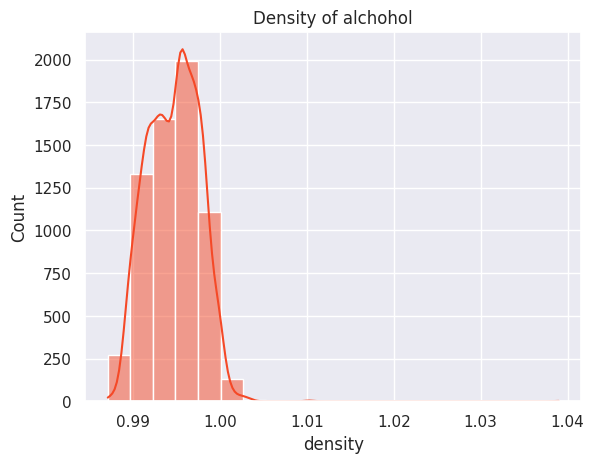

In [ ]:
sns.set_theme(style= "darkgrid") #to add grid lines
sns.histplot(data["density"], bins=20, kde=True, color="#F54927")
plt.title("Density of alchohol") #title
plt.show

<Axes: ylabel='pH'>

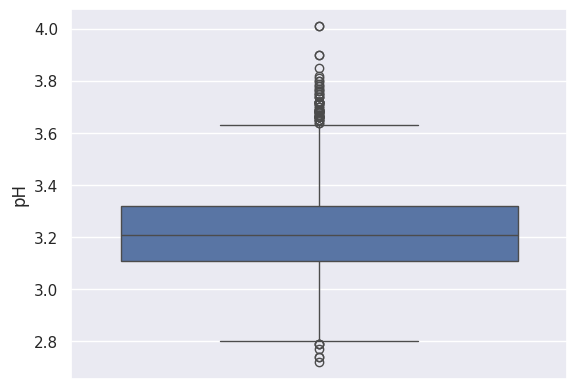

In [ ]:
sns.boxplot(data["pH"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data["type"]= le.fit_transform(data['type'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop("type", axis = 1)
y = data["type"]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 42) #random state is used to set the data for the training since when we re start the data we want the model to read the exact data that was previous given for traning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc= dtc.predict(x_test)

In [ ]:
#confusion matrix and  accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print ("Accuracy :", accuracy_score(y_test, y_pred_dtc))

Accuracy : 0.9823076923076923


In [ ]:
cm = confusion_matrix(y_test, y_pred_dtc)

In [ ]:
print (cm)

[[329  12]
 [ 11 948]]


<Axes: >

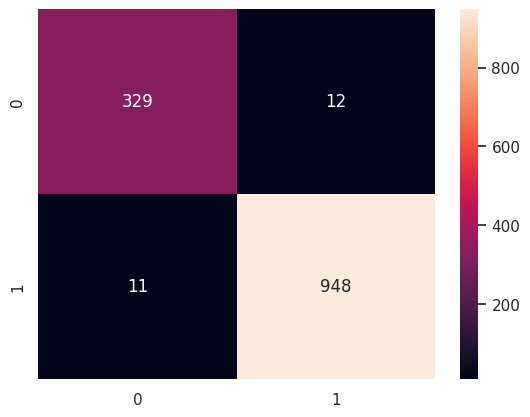

In [ ]:
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc= rfc.predict(x_test)

In [ ]:
print ("Accuracy :", accuracy_score(y_test, y_pred_dtc))

Accuracy : 0.9823076923076923


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred_dtc)

<Axes: >

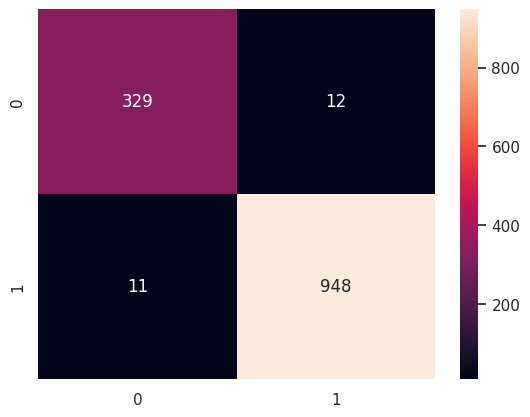

In [ ]:
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
importances = rfc.feature_importances_
features = x.columns

In [ ]:
fea_imp = pd.DataFrame({"Feature" : features, "Importance": importances})

In [ ]:
fea_imp.sort_values(by='Importance', ascending=False).head(5)

,Feature,Importance
6,total sulfur dioxide,0.287844
4,chlorides,0.269813
1,volatile acidity,0.122217
5,free sulfur dioxide,0.065916
7,density,0.062935


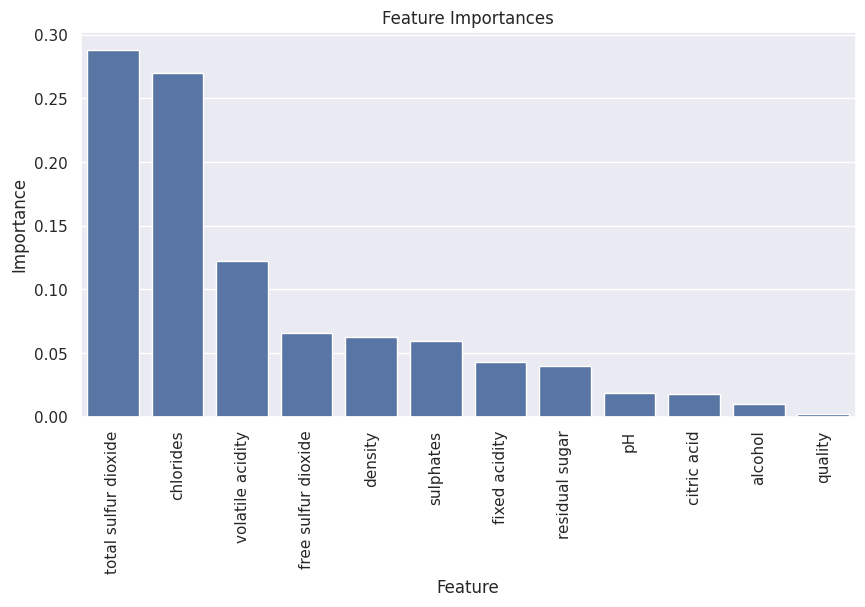

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=fea_imp,x="Feature",y="Importance", order= fea_imp.sort_values(by='Importance', ascending=False)['Feature'])
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(dtc, "wine_quality_model.pkl")

['wine_quality_model.pkl']

In [ ]:
from google.colab import files
files.download("wine_quality_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# to upload a model in any colab book
# from google.colab import files
# uploaded = files.upload()
# model=joblib.load("wine_type_dt.pkl")